In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
df=pd.read_csv("Iris.csv")
df.drop("Id",axis=1,inplace=True)
df.drop("SepalWidthCm",axis=1,inplace=True)
df.drop("PetalWidthCm",axis=1,inplace=True)
data=df.drop("Species",axis=1)

target=df["Species"]


In [5]:
data

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [6]:
target

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [7]:
ss=StandardScaler()
le=LabelEncoder()
data=ss.fit_transform(data)
target=le.fit_transform(target)

In [8]:
X_train,X_test,Y_train,Y_test=train_test_split(data,target,test_size=0.2)


In [9]:
lr=LinearRegression()

In [10]:
lr.fit(X_train,Y_train)

LinearRegression()

In [11]:
pred=lr.predict(X_test)
print(pred)

[-0.04752214  1.66710946 -0.11349869  0.0184544  -0.02934787  2.15857328
  1.18175179  1.76271402  1.61930719 -0.06569641  1.82869056  1.96873712
  1.24299513  1.77752802  1.6489352   1.45100556  0.04670947  1.78898176
  1.88657363  1.26254234  1.68528373 -0.04416188  1.68528373  1.6388544
 -0.15320749  1.6785632   0.06152347  1.0746935  -0.08051041  1.07133324]


In [12]:
print("Mean_absolute_error=",mean_absolute_error(Y_test,pred))
print("Mean_squared_error=",mean_squared_error(Y_test,pred))
print("Root mean squared error=",np.sqrt(mean_squared_error(Y_test,pred)))

Mean_absolute_error= 0.19216118165577695
Mean_squared_error= 0.058699169819924756
Root mean squared error= 0.24227911552571912


In [13]:
X_test=ss.inverse_transform(X_test)
z=X_test.T

In [19]:
sorted_x_test = np.sort(X_test[:,:])

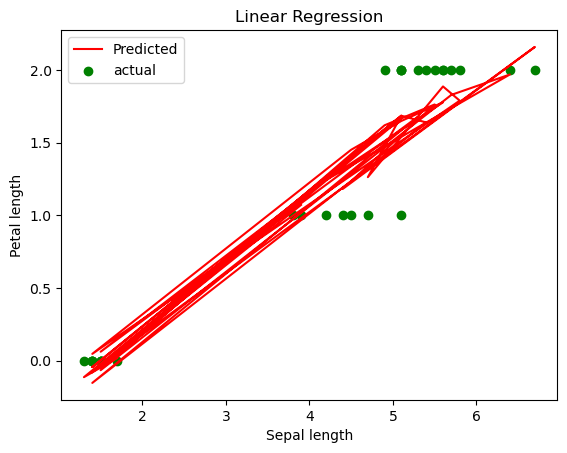

In [22]:
plt.title("Linear Regression")
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.plot(sorted_x_test[:,0],pred,color="red",label="Predicted")
plt.scatter(sorted_x_test[:,0],Y_test,color="green",label="actual")
plt.legend(loc="best")
plt.show()